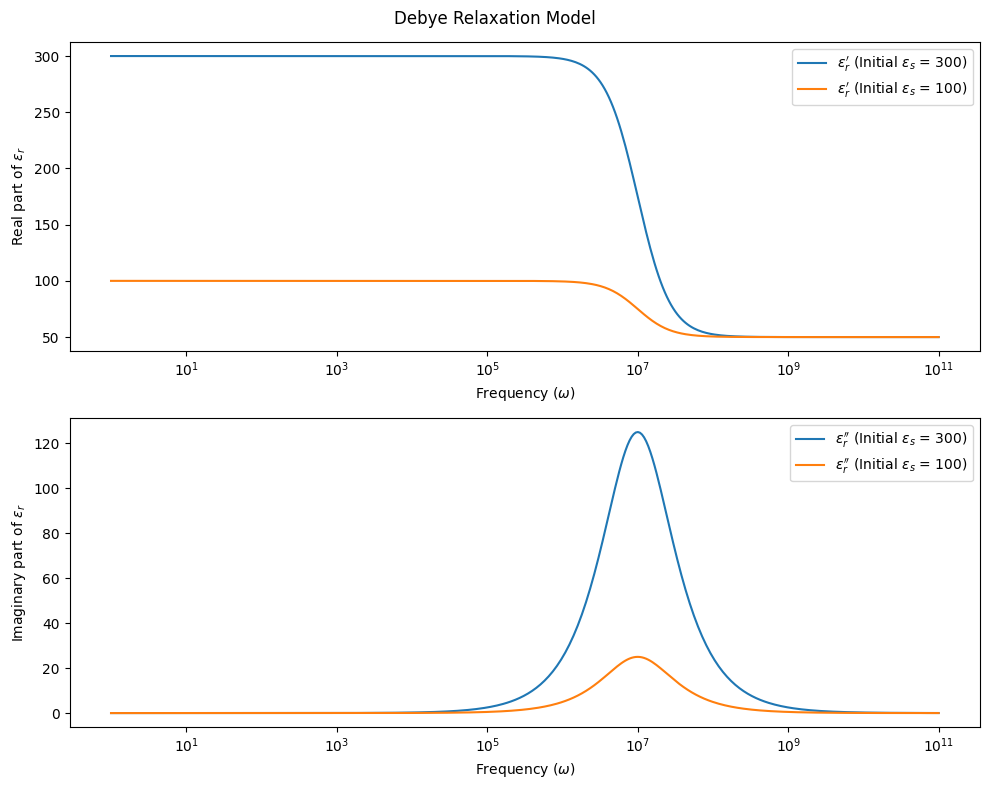

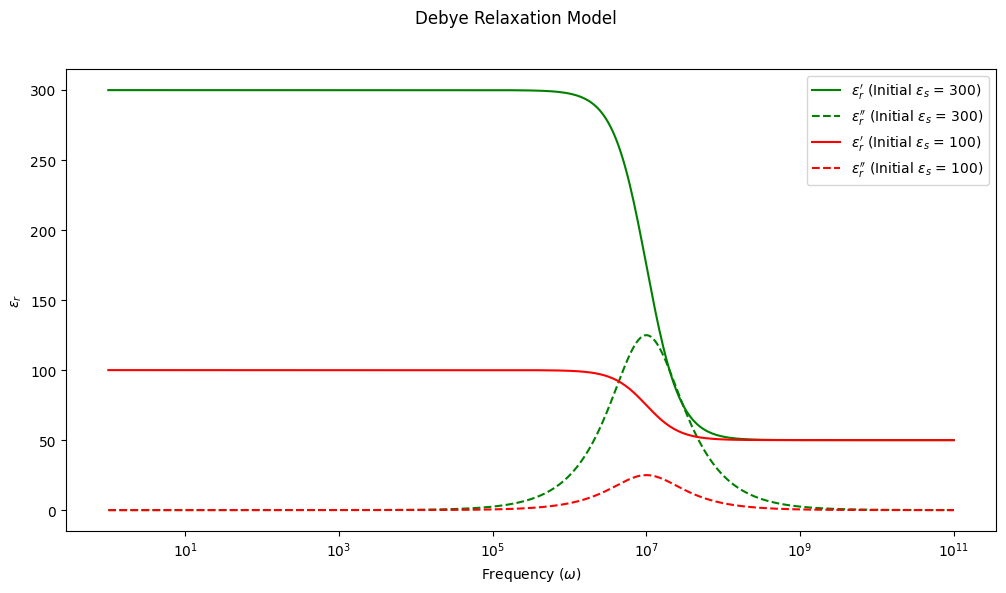

In [2]:
# scripted in python 3.11.5 kernel
import matplotlib.pyplot as plt
import numpy as np

# Define Debye relaxation model
def Debye(eps_inf, eps_s, tau, omega):
  return eps_inf + (eps_s - eps_inf) / (1j*omega*tau + 1)

# Define constants
eps_inf = 50  # Epsilon infinity
eps_s_1 = 300  # Epsilon initial for case 1
eps_s_2 = 100  # Epsilon initial for case 2
tau = 1e-7  # Relaxation time

# frequency range (in rad/s)
f_max = 1e11  # Maximum frequency
omega = np.logspace(0, np.log10(f_max), 400) # Logarithmic frequency range

# Calculate permittivity for case 1 and case 2
eps_r1 = Debye(eps_inf, eps_s_1, tau, omega)
eps_r2 = Debye(eps_inf, eps_s_2, tau, omega)

# Create plot
plt.figure(figsize=(10, 8))

# Plot permittivity of real part vs frequency
plt.subplot(211)
plt.semilogx(omega, eps_r1.real, label=r"$\epsilon_r'$ (Initial $\epsilon_s$ = 300)")
plt.semilogx(omega, eps_r2.real, label=r"$\epsilon_r'$ (Initial $\epsilon_s$ = 100)")
plt.xlabel(r"Frequency ($\omega$)")
plt.ylabel(r"Real part of $\epsilon_r$")
plt.legend()

# Plot permittivity of imaginary part vs frequency
plt.subplot(212)
plt.semilogx(omega, -eps_r1.imag, label=r"$\epsilon_r''$ (Initial $\epsilon_s$ = 300)")
plt.semilogx(omega, -eps_r2.imag, label=r"$\epsilon_r''$ (Initial $\epsilon_s$ = 100)")
plt.xlabel(r"Frequency ($\omega$)")
plt.ylabel(r"Imaginary part of $\epsilon_r$")
plt.suptitle("Debye Relaxation Model")
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# all in one plot
plt.figure(figsize=(12, 6))
plt.suptitle("Debye Relaxation Model")
plt.semilogx(omega, eps_r1.real, 'g-', label=r"$\epsilon_r'$ (Initial $\epsilon_s$ = 300)")
plt.semilogx(omega, -eps_r1.imag, 'g--', label=r"$\epsilon_r''$ (Initial $\epsilon_s$ = 300)")
plt.semilogx(omega, eps_r2.real, 'r-', label=r"$\epsilon_r'$ (Initial $\epsilon_s$ = 100)")
plt.semilogx(omega, -eps_r2.imag, 'r--', label=r"$\epsilon_r''$ (Initial $\epsilon_s$ = 100)")
plt.xlabel(r"Frequency ($\omega$)")
plt.ylabel(r"$\epsilon_r$")
plt.legend()
plt.show()

In [3]:
# show the case 1 in plotly with real and imaginary part (imag in dotted line with same color)
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=omega, y=eps_r1.real, mode='lines', name=r"$\epsilon_r'$ (Initial $\epsilon_s$ = 300)", line=dict(color='green')))
fig.add_trace(go.Scatter(x=omega, y=-eps_r1.imag, mode='lines', name=r"$\epsilon_r''$ (Initial $\epsilon_s$ = 300)", line=dict(color='green', dash='dash')))
fig.update_xaxes(type="log")
fig.update_yaxes(title_text=r"$\epsilon_r$")
fig.update_layout(title="Debye Relaxation Model (Case 1)")
fig.show()

# show the case 2 in plotly with real and imaginary part (imag in dotted line with same color)
fig = go.Figure()
fig.add_trace(go.Scatter(x=omega, y=eps_r2.real, mode='lines', name=r"$\epsilon_r'$ (Initial $\epsilon_s$ = 100)", line=dict(color='red')))
fig.add_trace(go.Scatter(x=omega, y=-eps_r2.imag, mode='lines', name=r"$\epsilon_r''$ (Initial $\epsilon_s$ = 100)", line=dict(color='red', dash='dash')))
fig.update_xaxes(type="log")
fig.update_yaxes(title_text=r"$\epsilon_r$")
fig.update_layout(title="Debye Relaxation Model (Case 2)")
fig.show()

# show the case 1 and case 2 in plotly with real and imaginary part (imag in dotted line with same color)
fig = go.Figure()
fig.add_trace(go.Scatter(x=omega, y=eps_r1.real, mode='lines', name=r"$\epsilon_r'$ (Initial $\epsilon_s$ = 300)", line=dict(color='green')))
fig.add_trace(go.Scatter(x=omega, y=-eps_r1.imag, mode='lines', name=r"$\epsilon_r''$ (Initial $\epsilon_s$ = 300)", line=dict(color='green', dash='dash')))
fig.add_trace(go.Scatter(x=omega, y=eps_r2.real, mode='lines', name=r"$\epsilon_r'$ (Initial $\epsilon_s$ = 100)", line=dict(color='red')))
fig.add_trace(go.Scatter(x=omega, y=-eps_r2.imag, mode='lines', name=r"$\epsilon_r''$ (Initial $\epsilon_s$ = 100)", line=dict(color='red', dash='dash')))
fig.update_xaxes(type="log")
fig.update_yaxes(title_text=r"$\epsilon_r$")
fig.update_layout(title="Debye Relaxation Model")
fig.show()

In [4]:
# Generate a pandas dataframe for the data
import csv
import pandas as pd
data = {'Frequency (rad/s)': omega, 'Epsilon_r1_real': eps_r1.real, 'Epsilon_r1_imag': eps_r1.imag, 'Epsilon_r2_real': eps_r2.real, 'Epsilon_r2_imag': eps_r2.imag}
df = pd.DataFrame(data)
df.head()
csv_file = 'Debye_relaxation_model.csv'
df.to_csv(csv_file, index=False)
print(f"Data saved to {csv_file}")

Data saved to Debye_relaxation_model.csv


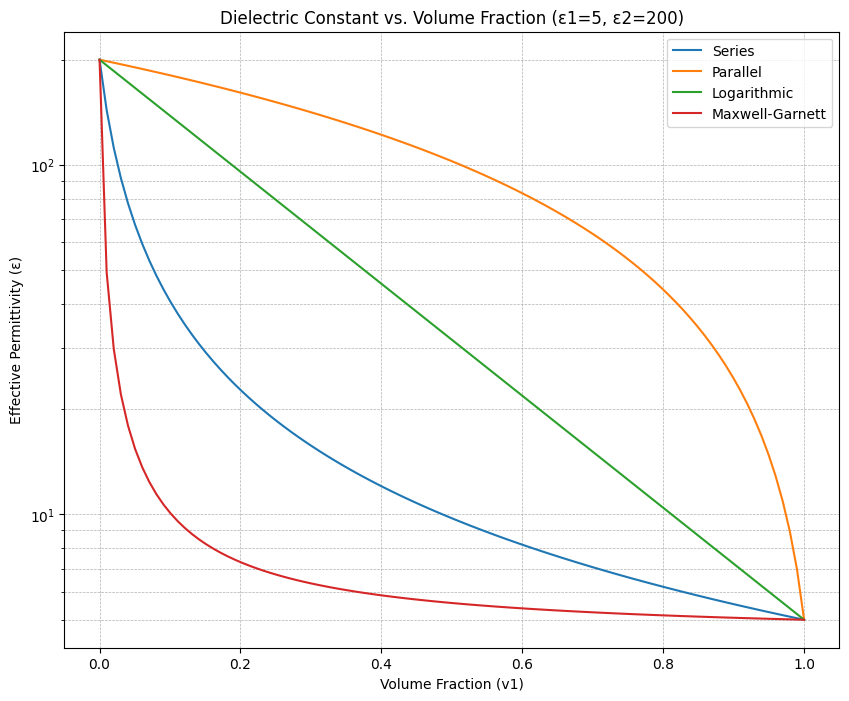

In [5]:
# Scripted in python 3.11.5 kernel
import matplotlib.pyplot as plt
import numpy as np

# Define mixing rules (series, parallel, logarithmic, and Maxwell-Garnett)
def series_mixing(eps1, eps2, v1):
  return 1/(((1 - v1)/eps2) + (v1/eps1))

def parallel_mixing(eps1, eps2, v1):
  return eps1*v1 + eps2*(1 - v1)

def log_mixing(eps1, eps2, v1):
  return np.exp(v1*np.log(eps1) + (1 - v1)*np.log(eps2))

def maxwell_mixing(eps1, eps2, v1):
  return (v1*eps1*((2/3)+(eps2/3*eps1))+eps2*(1-v1)) / (((2/3)+(eps2/3*eps1))*v1+(1-v1))

# Dielectric constants
eps1 = 5
eps2 = 200

# Volume fraction range
v = np.linspace(0, 1, 100) 

# Calculate effective permittivities for different mixing rules
eps_series = series_mixing(eps1, eps2, v)
eps_parallel = parallel_mixing(eps1, eps2, v)
eps_log = log_mixing(eps1, eps2, v)
eps_maxwell = maxwell_mixing(eps1, eps2, v)

# Plotting
plt.figure(figsize=(10, 8))
plt.semilogy(v, eps_series, label='Series')
plt.semilogy(v, eps_parallel, label='Parallel')
plt.semilogy(v, eps_log, label='Logarithmic')
plt.semilogy(v, eps_maxwell, label='Maxwell-Garnett')
plt.xlabel('Volume Fraction (v1)')
plt.ylabel('Effective Permittivity (ε)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Dielectric Constant vs. Volume Fraction (ε1=5, ε2=200)')
plt.show()

In [6]:
import plotly.graph_objects as go
import numpy as np

# Define mixing rules (series, parallel, logarithmic, and Maxwell-Garnett)
def series_mixing(eps1, eps2, v1):
    return 1/(((1 - v1)/eps2) + (v1/eps1))

def parallel_mixing(eps1, eps2, v1):
    return eps1*v1 + eps2*(1 - v1)

def log_mixing(eps1, eps2, v1):
    return np.exp(v1*np.log(eps1) + (1 - v1)*np.log(eps2))

def maxwell_mixing(eps1, eps2, v1):
    return (v1*eps1*((2/3)+(eps2/3*eps1))+eps2*(1-v1)) / (((2/3)+(eps2/3*eps1))*v1+(1-v1))

# Dielectric constants
eps1 = 5
eps2 = 200

# Volume fraction range
v = np.linspace(0, 1, 100) 

# Calculate effective permittivities for different mixing rules
eps_series = series_mixing(eps1, eps2, v)
eps_parallel = parallel_mixing(eps1, eps2, v)
eps_log = log_mixing(eps1, eps2, v)
eps_maxwell = maxwell_mixing(eps1, eps2, v)

# Plotting with Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=v, y=eps_series, mode='lines', name='Series'))
fig.add_trace(go.Scatter(x=v, y=eps_parallel, mode='lines', name='Parallel'))
fig.add_trace(go.Scatter(x=v, y=eps_log, mode='lines', name='Logarithmic'))
fig.add_trace(go.Scatter(x=v, y=eps_maxwell, mode='lines', name='Maxwell-Garnett'))

fig.update_layout(
    title='Dielectric Constant vs. Volume Fraction',
    xaxis_title='Volume Fraction (v1)',
    yaxis_title='Effective Permittivity (ε)',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    xaxis=dict(
        type='linear'
    ),
    yaxis=dict(
        type='log'
    ),
    width=800, height = 600
)

fig.show()

In [8]:
# Generate a pandas dataframe for the data
import pandas as pd
data = {'Volume Fraction': v, 'Series': eps_series, 'Parallel': eps_parallel, 'Logarithmic': eps_log, 'Maxwell-Garnett': eps_maxwell}
df = pd.DataFrame(data)
csv_file = 'Mixing_rules.csv'
df.to_csv(csv_file, index=False)
print(f"Data saved to {csv_file}")
df.head(100)

Data saved to Mixing_rules.csv


,Volume Fraction,Series,Parallel,Logarithmic,Maxwell-Garnett
0,0.000000,200.000000,200.000000,200.000000,200.000000
1,0.010101,143.478261,198.030303,192.684851,49.236111
2,0.020202,111.864407,196.060606,185.637259,29.725490
3,0.030303,91.666667,194.090909,178.847438,22.049180
4,0.040404,77.647059,192.121212,172.305960,17.945493
...,...,...,...,...,...
95,0.959596,5.205047,12.878788,5.803630,5.024579
96,0.969697,5.152225,10.909091,5.591358,5.018243
97,0.979798,5.100464,8.939394,5.386850,5.012037
98,0.989899,5.049732,6.969697,5.189822,5.005957
